In [2]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [7, 3]
plt.rcParams['figure.dpi'] = 100
plt.style.use('seaborn-notebook')

# Sistemas de EDOs - PVI

Nesta seção vamos ver como resolver um sistema de equações diferenciais ordinárias onde são fornecidas as condições em um mesmo instante (PVI).

Suponha que tenhamos um sistema de equações diferenciais que desejamos resolver, do tipo:

\begin{equation} \label{eq:sode}
\begin{array}{c}
\dfrac{dy_1}{dt} = f_1(t, y_1, y_2, \ldots, y_n) \\
\dfrac{dy_2}{dt} = f_2(t, y_1, y_2, \ldots, y_n) \\
\vdots \\
\dfrac{dy_n}{dt} = f_n(t, y_1, y_2, \ldots, y_n) 
\end{array}
\end{equation}

## Exemplo: Predador-presa

https://scipy-cookbook.readthedocs.io/items/LoktaVolterraTutorial.html



\begin{equation}
\dfrac{dx}{dt} = x(\alpha - \beta y)
\end{equation}

\begin{equation}
\dfrac{dy}{dt} = y(\delta x - \gamma)
\end{equation}

In [3]:
# definindo a função de Lotka-Volterra (predador-presa)
# dx/dt = x(a - by)
# dy/dt = y(dx - c)
def predadorpresa(t, Y):
    a = 1.0
    b = 0.1
    c = 1.5
    d = 0.075
    x = Y[0]
    y = Y[1]
    dy_dt = [ x*(a - b*y) , y*(d*x - c) ]
    return dy_dt

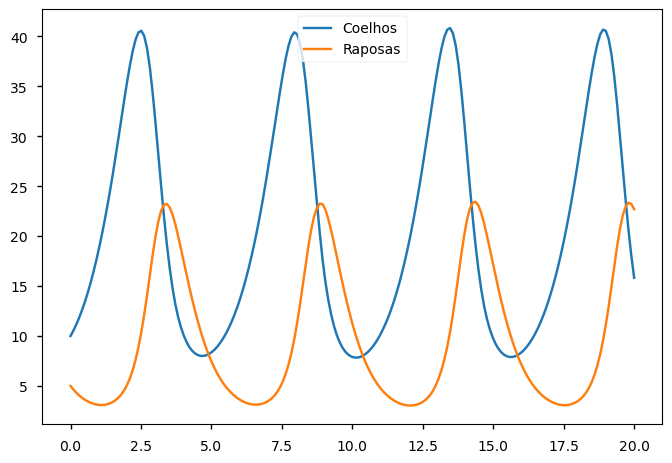

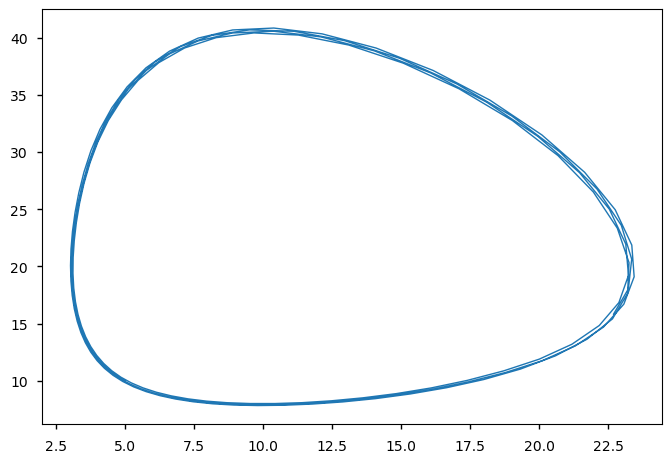

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# definindo os instantes que serão utilizados no cálculo 
tinicial = 0
tfinal = 20
t = np.linspace(tinicial , tfinal, 200)

# definindo a condição inicial (PVI)
y0 = [10 , 5]

# chamando o método numérico que calcula a solução da EDO
sol = solve_ivp( predadorpresa, y0 = y0, t_span = [tinicial, tfinal],  t_eval = t)
presa = sol.y[0]
predador = sol.y[1]

# exibindo o gráfico da resposta
plt.plot(t, presa, t, predador)
plt.legend(['Coelhos', 'Raposas'])

plt.figure()
plt.plot(predador, presa, lw=1)

## Exemplo: Queda livre

Vamos supor que desejamos conhecer tanto a velocidade quanto a posição do corpo rígido no problema anterior.
O problema pode ser formulado através de 2 equações diferenciais:

$
\begin{array}{l}
\dfrac{dx}{dt} = v \\
\dfrac{dv}{dt} = g - \dfrac{c_d}{m}v^2
\end{array}
$

Supondo que as condições iniciais são $x(0) = 0$ e $v(0) = 0$ então temos um PVI com um sistema de equações diferenciais.

Vamos criar um vetor $y = [x, v]$ contendo as duas variáveis que desejamos descobrir ($y_1 = x$ e $y_2 = v$).
Assim, o sistema pode ser escrito conforme o formato descrito em \ref{eq:sode}:

$
\begin{array}{l}
\dfrac{dy_1}{dt} = y_2 \\
\dfrac{dy_2}{dt} = g - \dfrac{c_d}{m}y_2^2
\end{array}
$


### Solução numérica

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

def quedalivre_sistema_edo(t, y):
    g = 9.81
    cd = 0.25
    m = 68.1
    ydot = 2*[None]
    ydot[0] = y[1]
    ydot[1] = g - cd/m * y[1]**2
    
    return ydot

Text(57.736111111111114, 0.5, 'Velocidade')

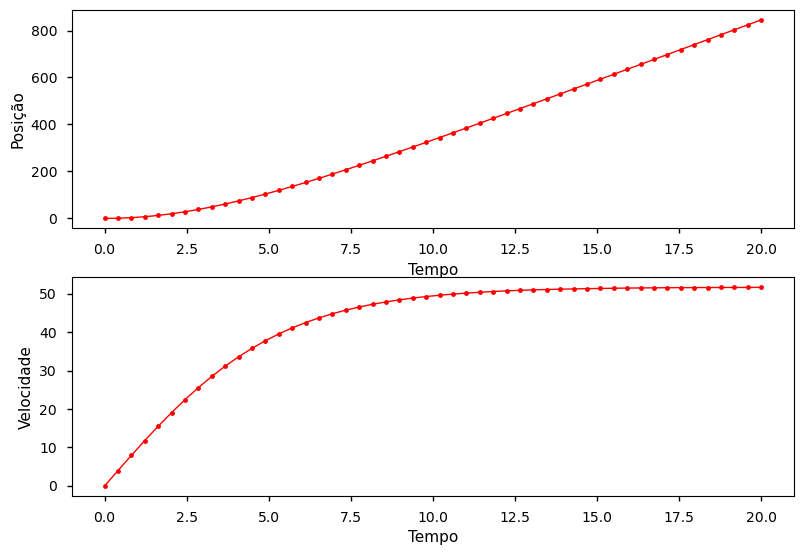

In [6]:
t = np.linspace(0,20) # instantes usados no calculo
y0 = [0, 0] # condicao inicial

res = solve_ivp( quedalivre_sistema_edo, y0 = y0, t_span = [0,20], t_eval = t) # resolucao do PVI

#print(res)
x = res.y[0]
v = res.y[1]

f, (ax1, ax2) = plt.subplots(2,1)
f.tight_layout()
ax1.plot(t, x, '.-r', lw=1)
ax1.set_xlabel('Tempo')
ax1.set_ylabel('Posição')
ax2.plot(t, v, '.-r', lw=1)
ax2.set_xlabel('Tempo')
ax2.set_ylabel('Velocidade')

### Solução analítica

Vimos anteriormente que a solução analítica para a velocidade é dada por:

$
v(t) = \sqrt{\dfrac{gm}{c_d}} \cdot \tanh \left(\sqrt{\dfrac{gc_d}{m}} \cdot t \right)
$

Substituindo este valor na equação $\frac{dx}{dt} = v$ e resolvendo-a, obtemos a forma analítica para a posição:

$
x(t) = \dfrac{m}{c_d}\ln \left[\cosh \left(\sqrt{\dfrac{gc_d}{m}} \cdot t \right) \right]
$


Somatória dos erros ao quadrado [VELOCIDADE = 0.002010072331438916 ] [POSIÇÃO = 0.13605230597134382 ]


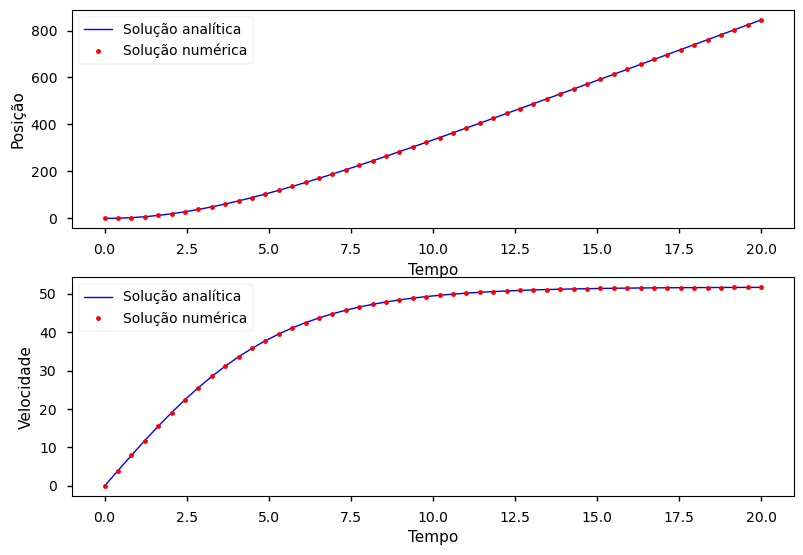

In [7]:
def quedalivre2_analitico(t):
    g = 9.81
    cd = 0.25
    m = 68.1
    v = np.sqrt(g*m/cd)*np.tanh(np.sqrt(g*cd/m)*t)
    x = m/cd*np.log(np.cosh(np.sqrt(g*cd/m)*t))
    return v,x

treal = np.linspace(0, 20)
(vreal, xreal) = quedalivre2_analitico(t)
# podemos comparar a solucao numerica obtida anteriormente com a solucao analitica:

f, (ax1, ax2) = plt.subplots(2,1)
f.tight_layout()
ax1.plot(treal, xreal, '-b', t, x, '.r', lw=1)
ax1.set_xlabel('Tempo')
ax1.set_ylabel('Posição')
ax1.legend(['Solução analítica', 'Solução numérica'])
ax2.plot(treal, vreal, '-b', t, v, '.r', lw=1)
ax2.set_xlabel('Tempo')
ax2.set_ylabel('Velocidade')
ax2.legend(['Solução analítica', 'Solução numérica'])

erro1 = np.sum((vreal - v)**2)
erro2 = np.sum((xreal - x)**2)
print('Somatória dos erros ao quadrado [VELOCIDADE =', erro1, '] [POSIÇÃO =', erro2, ']')